In [2]:
from data_prep import read_train_data, read_test_data, create_Xy
from model_building import modeller
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# %load_ext autoreload
%autoreload 2

## Preparation of Data

In [90]:
all_cont_cols = train.select_dtypes(exclude=[bool, object, np.datetime64]).drop(['Used_Amount', 'UsageRate', 
                                                                                 'Carnegie'], axis=1).columns

In [91]:
train = read_train_data()
test = read_test_data()

transform = StandardScaler()
transform.fit(train[all_cont_cols])

train[all_cont_cols] = transform.transform(train[all_cont_cols])
test[all_cont_cols] = transform.transform(test[all_cont_cols])

# Build Models

### Process
1. Specify columns to be used 
2. Of the columns to be used, if using CatBoost, specify the categorical variables
3. Create X and y and then split into training and test sets
4. Specify the model parameters
5. Fit the model
6. Generate predictions
7. Evaluate
8. If the model is good, save the predictions of the test set

## Model 1

In [142]:
columns = ["TotalDays_award", "TotalDays_usage", "PI_New", "PI_PrevUsage", "PI_PrevUsageRate",
           "Org_New", 'Org_PrevUsage', 'Org_PrevUsageRate', "EndYear_usage",
           "count_Project", "count_Resource", "count_ProjectType", "Initial_Allocation", "Final_Allocation"]

spec = {'framework': 'LinearRegression',
               'params': {},
               'y_var': 'UsageRate'}

y, X = create_Xy(data=train, x_cols = columns, y_col="UsageRate")
X_Train, X_Test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

model1 = modeller(y_train, X_Train, spec, cat_feats=cat_vars)

model1.predict(X_Train, X_Test)
model1_eval = model1.evaluate(y_train, y_test)

## Model 2

In [143]:
columns = ["TotalDays_award", "TotalDays_usage", "PI_New", "PI_PrevUsage", "PI_PrevUsageRate",
           "Org_New", 'Org_PrevUsage', 'Org_PrevUsageRate', "EndYear_usage",
           "count_Project", "count_Resource", "count_ProjectType", "Initial_Allocation", "Final_Allocation",
          'FoS_AdvSciComp', 'FoS_AstronmSci', 'FoS_AtmosphSci', 'FoS_BioChemMol',
           'FoS_BiologySci', 'FoS_BioPhysics', 'FoS_ChemReactP', 'FoS_ChemThermS',
           'FoS_Chemistry', 'FoS_CompMath', 'FoS_CompCompR', 'FoS_CondMatPhy',
           'FoS_EarthSci', 'FoS_Engineer', 'FoS_ExtAstrCos', 'FoS_FluidPartH',
           'FoS_GeneNuclAc', 'FoS_MaterialRe', 'FoS_MechanMate', 'FoS_MoleculBio',
           'FoS_PhysChem', 'FoS_Physics', 'FoS_StellAstro', 'FoS_OtherBio',
           'FoS_OtherComp', 'FoS_OtherEngi', 'FoS_OtherGeos', 'FoS_OtherMathPhys',
           'FoS_SociBehEco', 'FoS_HumanArts']

spec = {'framework': 'RandomForestRegressor',
               'params': {'n_estimators': 100, 'random_state': 42, 'criterion': 'squared_error', 
                         'min_samples_leaf': 4, 'bootstrap': True},
               'y_var': 'UsageRate'}

y, X = create_Xy(data=train, x_cols = columns, y_col="UsageRate")
X_Train, X_Test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

model2 = modeller(y_train, X_Train, spec, cat_feats=cat_vars)

model2.predict(X_Train, X_Test)
model2_eval = model2.evaluate(y_train, y_test)

## Model 3

In [144]:
columns = ["TotalDays_award", "TotalDays_usage", "PI_New", "PI_PrevUsage", "PI_PrevUsageRate",
           "Org_New", 'Org_PrevUsage', 'Org_PrevUsageRate', "EndYear_usage",
           "count_Project", "count_Resource", "count_ProjectType", "Initial_Allocation", "Final_Allocation",
          'FoS_AdvSciComp', 'FoS_AstronmSci', 'FoS_AtmosphSci', 'FoS_BioChemMol',
           'FoS_BiologySci', 'FoS_BioPhysics', 'FoS_ChemReactP', 'FoS_ChemThermS',
           'FoS_Chemistry', 'FoS_CompMath', 'FoS_CompCompR', 'FoS_CondMatPhy',
           'FoS_EarthSci', 'FoS_Engineer', 'FoS_ExtAstrCos', 'FoS_FluidPartH',
           'FoS_GeneNuclAc', 'FoS_MaterialRe', 'FoS_MechanMate', 'FoS_MoleculBio',
           'FoS_PhysChem', 'FoS_Physics', 'FoS_StellAstro', 'FoS_OtherBio',
           'FoS_OtherComp', 'FoS_OtherEngi', 'FoS_OtherGeos', 'FoS_OtherMathPhys',
           'FoS_SociBehEco', 'FoS_HumanArts']

spec = {'framework': 'RandomForestRegressor',
               'params': {'n_estimators': 75, 'random_state': 42, 'criterion': 'squared_error', 
                         'min_samples_leaf': 10, 'bootstrap': True},
               'y_var': 'UsageRate'}

y, X = create_Xy(data=train, x_cols = columns, y_col="UsageRate")
X_Train, X_Test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

model3 = modeller(y_train, X_Train, spec, cat_feats=cat_vars)

model3.predict(X_Train, X_Test)
model3_eval = model3.evaluate(y_train, y_test)

## Model 4

In [145]:
columns = ["TotalDays_award", "TotalDays_usage", "PI_New", "PI_PrevUsage", "PI_PrevUsageRate",
           "Org_New", 'Org_PrevUsage', 'Org_PrevUsageRate', "EndYear_usage",
           "count_Project", "count_Resource", "count_ProjectType", "Initial_Allocation", "Final_Allocation",
          'FoS_AdvSciComp', 'FoS_AstronmSci', 'FoS_AtmosphSci', 'FoS_BioChemMol',
           'FoS_BiologySci', 'FoS_BioPhysics', 'FoS_ChemReactP', 'FoS_ChemThermS',
           'FoS_Chemistry', 'FoS_CompMath', 'FoS_CompCompR', 'FoS_CondMatPhy',
           'FoS_EarthSci', 'FoS_Engineer', 'FoS_ExtAstrCos', 'FoS_FluidPartH',
           'FoS_GeneNuclAc', 'FoS_MaterialRe', 'FoS_MechanMate', 'FoS_MoleculBio',
           'FoS_PhysChem', 'FoS_Physics', 'FoS_StellAstro', 'FoS_OtherBio',
           'FoS_OtherComp', 'FoS_OtherEngi', 'FoS_OtherGeos', 'FoS_OtherMathPhys',
           'FoS_SociBehEco', 'FoS_HumanArts',
          'count_Project', 'count_UsageRecord', 'count_FoS', 'count_FoSDivision',
           'count_FoSDirectorate', 'count_ProjectType', 'count_Resource',
           'count_Transaction_award', 'count_Transaction_usage',
           'count_ProjectTitle']

spec = {'framework': 'GradientBoostingRegressor',
               'params': {'n_estimators': 100, 'random_state': 42, 'loss': 'squared_error', 
                         'min_samples_leaf': 5},
               'y_var': 'UsageRate'}

y, X = create_Xy(data=train, x_cols = columns, y_col="UsageRate")
X_Train, X_Test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

model4 = modeller(y_train, X_Train, spec, cat_feats=cat_vars)

model4.predict(X_Train, X_Test)
model4_eval = model4.evaluate(y_train, y_test)

## Model 5

In [146]:
columns = ["TotalDays_award", "TotalDays_usage", "PI_New", "PI_PrevUsage", "PI_PrevUsageRate",
           "Org_New", 'Org_PrevUsage', 'Org_PrevUsageRate', "EndYear_usage", 
           "Initial_Allocation", "Final_Allocation",
           'FoS_AdvSciComp', 'FoS_AstronmSci', 'FoS_AtmosphSci', 'FoS_BioChemMol',
           'FoS_BiologySci', 'FoS_BioPhysics', 'FoS_ChemReactP', 'FoS_ChemThermS',
           'FoS_Chemistry', 'FoS_CompMath', 'FoS_CompCompR', 'FoS_CondMatPhy',
           'FoS_EarthSci', 'FoS_Engineer', 'FoS_ExtAstrCos', 'FoS_FluidPartH',
           'FoS_GeneNuclAc', 'FoS_MaterialRe', 'FoS_MechanMate', 'FoS_MoleculBio',
           'FoS_PhysChem', 'FoS_Physics', 'FoS_StellAstro', 'FoS_OtherBio',
           'FoS_OtherComp', 'FoS_OtherEngi', 'FoS_OtherGeos', 'FoS_OtherMathPhys',
           'FoS_SociBehEco', 'FoS_HumanArts',
           'count_Project', 'count_UsageRecord', 'count_FoS', 'count_FoSDivision',
           'count_FoSDirectorate', 'count_ProjectType', 'count_Resource',
           'count_Transaction_award', 'count_Transaction_usage',
           'count_ProjectTitle',
           'Resource_anl', 'Resource_cct', 'Resource_gatech', 'Resource_iu_T',
           'Resource_iu_X', 'Resource_ncar', 'Resource_ncsa', 'Resource_nics_T',
           'Resource_nics_X', 'Resource_ornl', 'Resource_osg', 'Resource_psc_T',
           'Resource_psc_X', 'Resource_purdue', 'Resource_sdsc_T',
           'Resource_sdsc_X', 'Resource_sgci', 'Resource_stanford',
           'Resource_tacc_T', 'Resource_tacc_X', 'Resource_ecss', 'Resource_xwfs',
           'Resource_abequeen', 'Resource_abequstl', 'Resource_asta',
           'Resource_gpfs', 'Resource_service', 'Resource_teragrid',
           'Resource_roam_T',
           'Organization', 'Carnegie']

cat_vars = ["PI_New", "Org_New",
            'FoS_AdvSciComp', 'FoS_AstronmSci', 'FoS_AtmosphSci', 'FoS_BioChemMol',
            'FoS_BiologySci', 'FoS_BioPhysics', 'FoS_ChemReactP', 'FoS_ChemThermS',
            'FoS_Chemistry', 'FoS_CompMath', 'FoS_CompCompR', 'FoS_CondMatPhy',
            'FoS_EarthSci', 'FoS_Engineer', 'FoS_ExtAstrCos', 'FoS_FluidPartH',
            'FoS_GeneNuclAc', 'FoS_MaterialRe', 'FoS_MechanMate', 'FoS_MoleculBio',
            'FoS_PhysChem', 'FoS_Physics', 'FoS_StellAstro', 'FoS_OtherBio',
            'FoS_OtherComp', 'FoS_OtherEngi', 'FoS_OtherGeos', 'FoS_OtherMathPhys',
            'FoS_SociBehEco', 'FoS_HumanArts', 'Organization', 'Carnegie']


spec = {'framework': 'CatBoostRegressor',
               'params': {'iterations': 1000, 'random_state': 42, 'loss_function': 'RMSE', 
                         'min_data_in_leaf': 5, 'verbose': 0},
               'y_var': 'UsageRate'}

y, X = create_Xy(data=train, x_cols = columns, y_col="UsageRate")
X_Train, X_Test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

model5 = modeller(y_train, X_Train, spec, cat_feats=cat_vars)

model5.predict(X_Train, X_Test)
model5_eval = model5.evaluate(y_train, y_test)

In [147]:
imp = pd.DataFrame(zip(X_Train.columns, model5.model.feature_importances_), 
                  columns=['Column', 'Importance']).sort_values('Importance', ascending=False)
imp.tail(15)

,Column,Importance
59,Resource_nics_X,0.014469
76,Resource_gpfs,0.011912
22,FoS_CondMatPhy,0.006299
77,Resource_service,0.005664
24,FoS_Engineer,0.003513
60,Resource_ornl,0.002142
17,FoS_ChemReactP,0.002087
72,Resource_xwfs,0.001688
68,Resource_stanford,0.001451
45,count_FoSDirectorate,0.001447


## Model 6

In [148]:
columns = ["TotalDays_award", "TotalDays_usage", "PI_New", "PI_PrevUsage", "PI_PrevUsageRate",
           'Org_PrevUsage', 'Org_PrevUsageRate', "EndYear_usage", 
           "Initial_Allocation", "Final_Allocation",
           'FoS_AdvSciComp', 'FoS_AstronmSci', 'FoS_AtmosphSci', 'FoS_BioChemMol',
           'FoS_BiologySci', 'FoS_BioPhysics', 'FoS_ChemThermS',
           'FoS_Chemistry', 'FoS_CompMath', 'FoS_CompCompR',
           'FoS_EarthSci', 'FoS_FluidPartH',
           'FoS_GeneNuclAc', 'FoS_MaterialRe', 'FoS_MechanMate', 'FoS_MoleculBio',
           'FoS_PhysChem', 'FoS_Physics', 'FoS_OtherBio',
           'FoS_OtherComp', 'FoS_OtherEngi', 'FoS_OtherGeos', 'FoS_OtherMathPhys',
           'FoS_SociBehEco', 'FoS_HumanArts',
           'count_Project', 'count_UsageRecord', 'count_FoS',
           'count_ProjectType', 'count_Resource',
           'count_Transaction_award', 'count_Transaction_usage',
           'count_ProjectTitle',
           'Resource_cct', 'Resource_gatech', 'Resource_iu_T',
           'Resource_iu_X', 'Resource_ncar', 'Resource_ncsa', 'Resource_nics_T',
           'Resource_osg', 'Resource_psc_T',
           'Resource_psc_X', 'Resource_purdue', 'Resource_sdsc_T',
           'Resource_sdsc_X',
           'Resource_tacc_T', 'Resource_tacc_X', 'Resource_ecss',
           'Resource_abequeen', 'Resource_abequstl', 'Resource_asta',
           'Resource_teragrid',
           'Resource_roam_T',
           'Organization', 'Carnegie']

cat_vars = ["PI_New",
            'FoS_AdvSciComp', 'FoS_AstronmSci', 'FoS_AtmosphSci', 'FoS_BioChemMol',
            'FoS_BiologySci', 'FoS_BioPhysics', 'FoS_ChemThermS',
            'FoS_Chemistry', 'FoS_CompMath', 'FoS_CompCompR',
            'FoS_EarthSci','FoS_FluidPartH',
            'FoS_GeneNuclAc', 'FoS_MaterialRe', 'FoS_MechanMate', 'FoS_MoleculBio',
            'FoS_PhysChem', 'FoS_Physics', 'FoS_OtherBio',
            'FoS_OtherComp', 'FoS_OtherEngi', 'FoS_OtherGeos', 'FoS_OtherMathPhys',
            'FoS_SociBehEco', 'FoS_HumanArts', 'Organization', 'Carnegie']


spec = {'framework': 'CatBoostRegressor',
               'params': {'iterations': 1000, 'random_state': 42, 'loss_function': 'RMSE', 
                         'min_data_in_leaf': 10, 'verbose': 0},
               'y_var': 'UsageRate'}

y, X = create_Xy(data=train, x_cols = columns, y_col="UsageRate")
X_Train, X_Test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

model6 = modeller(y_train, X_Train, spec, cat_feats=cat_vars)

model6.predict(X_Train, X_Test)
model6_eval = model6.evaluate(y_train, y_test)

In [149]:
imp = pd.DataFrame(zip(X_Train.columns, model6.model.feature_importances_), 
                  columns=['Column', 'Importance']).sort_values('Importance', ascending=False)
imp.tail(15)

,Column,Importance
38,count_ProjectType,0.098851
60,Resource_abequstl,0.093967
56,Resource_tacc_T,0.087235
52,Resource_psc_X,0.080030
22,FoS_GeneNuclAc,0.078652
37,count_FoS,0.073043
18,FoS_CompMath,0.071334
34,FoS_HumanArts,0.066232
46,Resource_iu_X,0.049930
24,FoS_MechanMate,0.047092


In [160]:
accuracy_summary = pd.concat([model1_eval, model2_eval, model3_eval, model4_eval, 
                              model5_eval, model6_eval], axis=0)

ind = [["OLS", "Random Forest", "Pruned Random Forest", "GB Forest", "CatBoost", "Trimmed CatBoost"], 
       ["Mean Squared Error"] * 6]

accuracy_summary.index = pd.MultiIndex.from_arrays(ind)
accuracy_summary

,,Train,Test
OLS,Mean Squared Error,0.683386,0.606727
Random Forest,Mean Squared Error,0.345262,0.578551
Pruned Random Forest,Mean Squared Error,0.479813,0.568173
GB Forest,Mean Squared Error,0.560827,0.574396
CatBoost,Mean Squared Error,0.380880,0.574375
Trimmed CatBoost,Mean Squared Error,0.373356,0.577630


### End of Modelling

## Generation of Test Results

In [497]:
predictions = model6.model.predict(test[columns])
submission = pd.DataFrame({'Grant_Number': test.index, 'UsageRate': predictions})
submission.to_csv('./Submissions/Submission15.csv', index=False)

### End of Test Results

## Visualizations

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

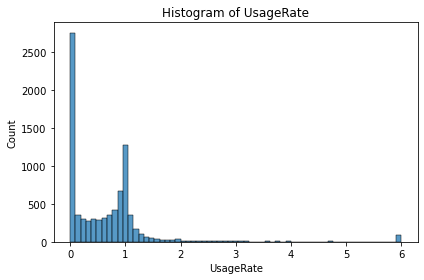

In [9]:
sns.histplot(train['UsageRate'])
plt.title('Histogram of UsageRate')
plt.tight_layout()
plt.savefig("UsageRate.png", dpi=300)
plt.show()

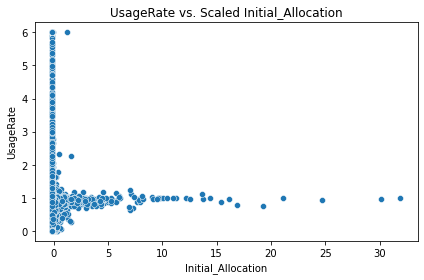

In [24]:
sns.scatterplot(data=train, x='Initial_Allocation', y='UsageRate')
plt.title('UsageRate vs. Scaled Initial_Allocation')
plt.tight_layout()
plt.savefig("Initial_Allocation.png", dpi=300)
plt.show()

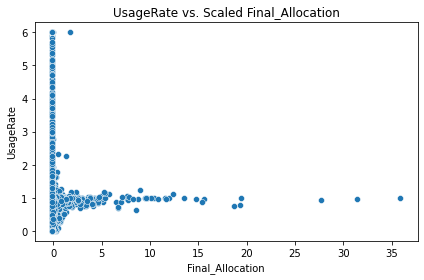

In [25]:
sns.scatterplot(data=train, x='Final_Allocation', y='UsageRate')
plt.title('UsageRate vs. Scaled Final_Allocation')
plt.tight_layout()
plt.savefig("Final_Allocation.png", dpi=300)
plt.show()

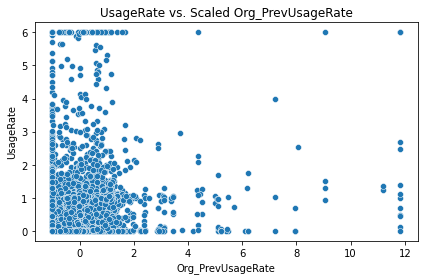

In [26]:
sns.scatterplot(data=train, x='Org_PrevUsageRate', y='UsageRate')
plt.title('UsageRate vs. Scaled Org_PrevUsageRate')
plt.tight_layout()
plt.savefig("Org_PrevUsageRate.png", dpi=300)
plt.show()

[]

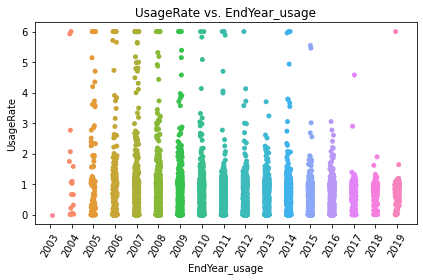

In [18]:
sns.stripplot(data=train, x='EndYear_usage', y='UsageRate')
plt.xticks(rotation=60)
plt.title("UsageRate vs. EndYear_usage")
plt.tight_layout()
plt.savefig("EndYear_usage.png", dpi=300)
plt.plot()

In [36]:
train[all_cont_cols].corr()[['UsageRate']].sort_values(by='UsageRate')

,UsageRate
StartYear_usage,-0.080745
StartYear_award,-0.077469
Org_PrevUsage,-0.042523
EndYear_award,-0.035949
EndYear_usage,-0.035650
Resource_iu_X,-0.016226
Resource_ecss,-0.011682
Resource_anl,-0.009823
count_Resource,-0.007698
Resource_gpfs,-0.004760
